## Machine Learning Coursework (Part 1)

For the coursework, please make sure to implement your own code and not use libraries (except where explicitly asked). You will need to present your own code that performs nested cross-validation and the k-nearest neighbour algorithm, build confusion matrices, and estimate distances between data samples.

The purpose of this coursework is to help you:
- Get familiar with **common python modules / functions** used for ML in python
- Get practical experience **implementing** ML methods in python  
- Get practical experience regarding **parameter selection** for ML methods
- Get practical experience on **evaluating** ML methods and applying cross-validation

Notes:
- don't use libraries that implement kNN or cross-validation.  We want to see your code!
- Remember to comment all of your code (see here for tips: https://stackabuse.com/commenting-python-code/). You can also make use of Jupyter Markdown, where appropriate, to improve the layout of your code and documentation.
- Please add docstrings to all of your functions (so that users can get information on inputs/outputs and what each function does by typing SHIFT+TAB over the function name. For more detail on python docstrings, see here: https://numpydoc.readthedocs.io/en/latest/format.html)
- When a question allows a free-form answer (e.g. what do you observe?), create a new markdown cell below and answer the question in the notebook. 
- Always save your notebook when you are done (this is not automatic)!
- Upload your completed notebook using the VLE

Plagiarism: please make sure that the material you submit has been created by you. Any sources you use for code should be properly referenced. Your code will be checked for plagiarism using appropriate software.

### Marking 

The grades in this coursework are allocated approximately as follows:

|                                                    | mark  |  
|----------------------------------------------------|-------|
| Data exploration (+ 2 questions)                   | 10     |  
| Code, docu. & comments (KNN + Evaluation + NCV)    | 10    |  
| Results (KNN folds + Summary + Confusion matrices) | 10     |  
| Final questions:                                   | 10     |  
| Overall quality & use of Markdown                  | 10     |  
| Total available                                    |**50** |  


## 1. Exploratory Data Analysis 

In this coursework we are going to be working with the **Wine** dataset. This is a 178 sample dataset that categorises 3 different types of Italian wine using 13 different features. The code below loads the Wine dataset and selects a subset of features for you to work with. 

In [1]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

# load data
wine=datasets.load_wine()
#print(wine.DESCR)

# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# extract the data as numpy arrays of features, X, and target, y
X = df_wine[selected_features].values
y = wine.target


In [2]:
# explore headers and variables in dataset

#print(wine.DESCR)
print(wine.feature_names)
print(X[0:5], '\n')

print(wine.target_names)
print(np.unique(y))

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
[[14.23  3.06  5.64  2.43]
 [13.2   2.76  4.38  2.14]
 [13.16  3.24  5.68  2.67]
 [14.37  3.49  7.8   2.5 ]
 [13.24  2.69  4.32  2.87]] 

['class_0' 'class_1' 'class_2']
[0 1 2]


### 1.1. Visualising the data

The first part of tackling any ML problem is visualising the data in order to understand some of the properties of the problem at hand.  When there are only a small number of classes and features, it is possible to use scatter plots to visualise interactions between different pairings of features. 

The following image shows what such a visualisation might look like on the Iris dataset that you worked on during the Topic exercises. 

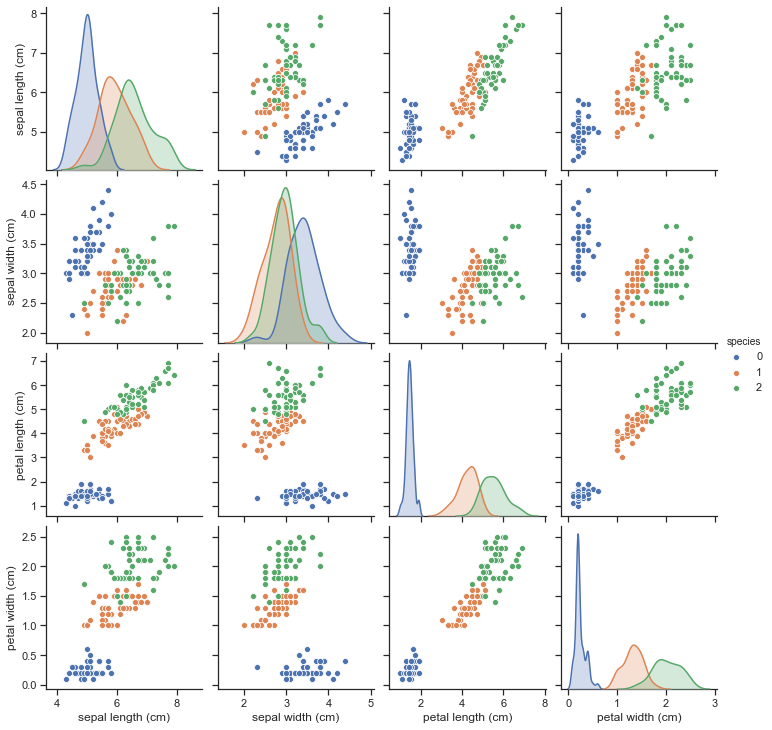

Your first task is to recreate a similar grid for the **Wine** dataset, with each off-diagonal subplot showing the interaction between two features, and each of the classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a distribution (or histogram) for that feature.     

You should create a function that, given data X and labels y, plots this grid.  The function should be invoked something like this:
        
    myplotGrid(X,y,...)
    
where X is your training data and y are the labels (you may also supply additional optional arguments). You can use an appropriate library to help you create the visualisation. You might want to code it yourself using matplotlib functions scatter and hist - however, this is not strictly necessary here, so try not spend too much time on this. 


In [3]:
# define plotting function

def myplotGrid(X, y, feature_names, target_names=None, target_title=None, palette=None):
    """
    Builds a grid of Axes of plotted data from given dataset using Seaborn.

    Parameters:
    X: features of the dataset
    y: target of the dataset
    feature_names: header names of features
    target_names: optional string list of class names
    target_title: optional string for legend title
    palette: optional colormap sample

    Returns:
    grid: subplots of pairwise relationships
    """
    X = pd.DataFrame(X)                                   # convert to dataframe
    X.columns = feature_names                             # concat header names and target
    X['target'] = y
    
    grid = sns.pairplot(X, hue='target', palette=palette) # create plot
    if target_title is not None:                          # set legend title and names
        grid._legend.set_title(target_title)
    if target_names is not None:
        for t, l in zip(grid._legend.texts, target_names):
            t.set_text(l)
    
    return grid


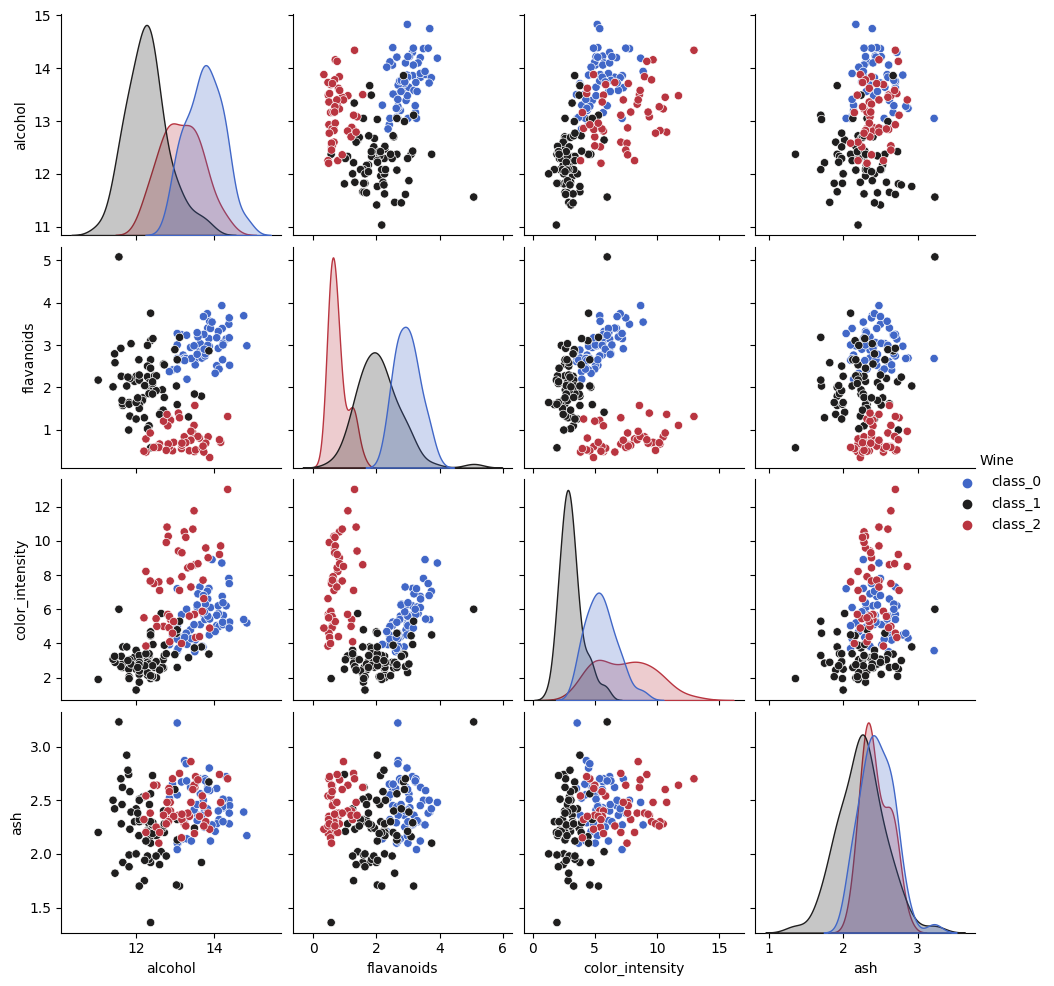

In [4]:
# run the plotting function

palette = sns.color_palette("icefire", n_colors=3)        # colormap component
myplotGrid(X, y, selected_features, wine.target_names, 'Wine', palette)

### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,

    # initialize random seed to replicate results over different runs
    mySeed = 12345 
    np.random.seed(mySeed) 
    XN=X+np.random.normal(0,0.6,X.shape)
    
and then invoke

    myplotGrid(XN,y)

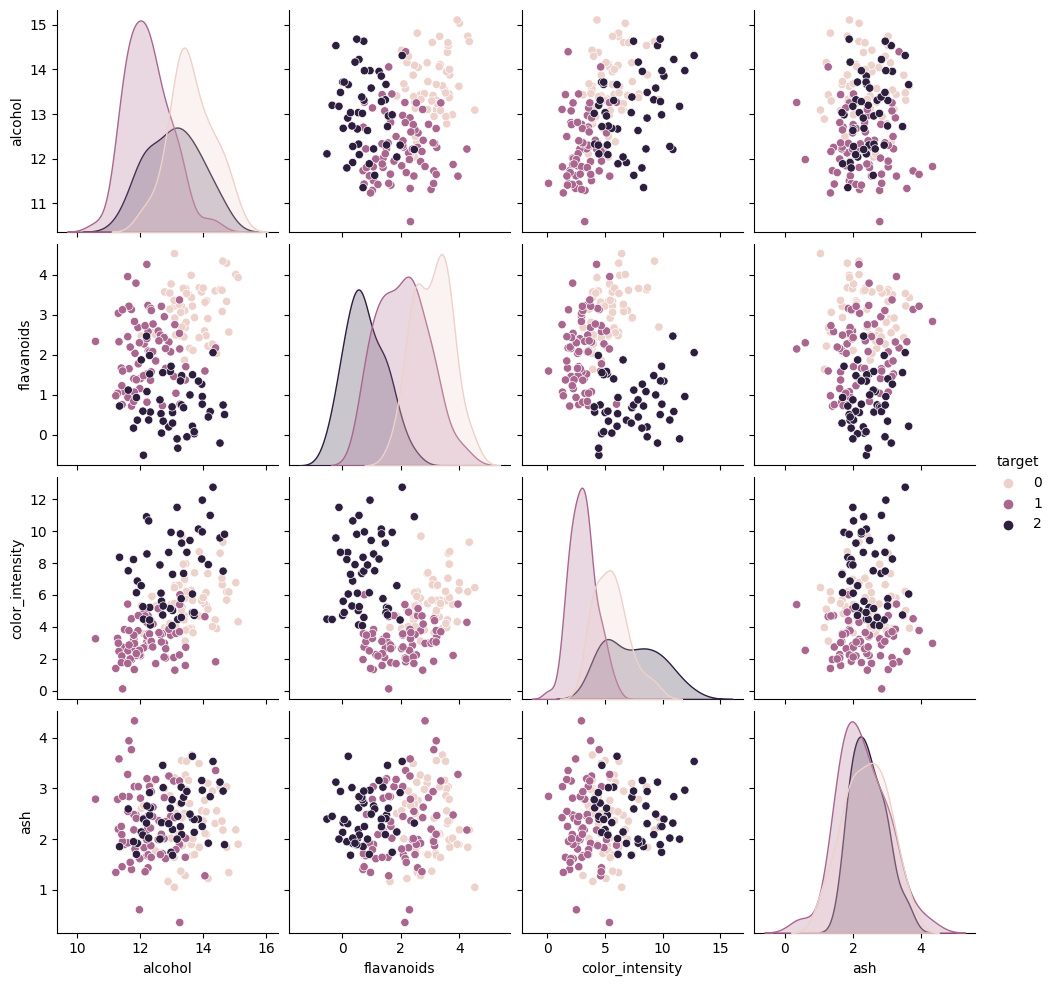

In [5]:
# noise code
mySeed = 12345 
np.random.seed(mySeed) 
XN = X + np.random.normal(0, 0.6, X.shape)

myplotGrid(XN, y, selected_features)


### Q1. Exploratory data analysis
Based on your exploratory analysis, if you were to build a classifier using only two of the available features, which ones would you choose and why?  Answer as fully as you can. 


#### Answer:

Based on the context of this dataset, there are only four features to consider.
Good features to use would have the following attributes:
- **minimizes overlapping** data points, ie. distinct boundary spaces
- **high correlation** between features and classes, ie. close to +1/-1

Subjectively, the best pair appears to be either `alcohol-flavanoids` or `color_intensity-flavanoids` through observing the subplots above.
These two pairs appear to have the best spread of data over the given plane while minimizing overlaps.

However, `alcohol` and `flavanoids` have the highest correlation value in the correlation heatmap (below).
Therefore, I can conclude the best two features are `alcohol` and `flavanoids`. 


<Axes: >

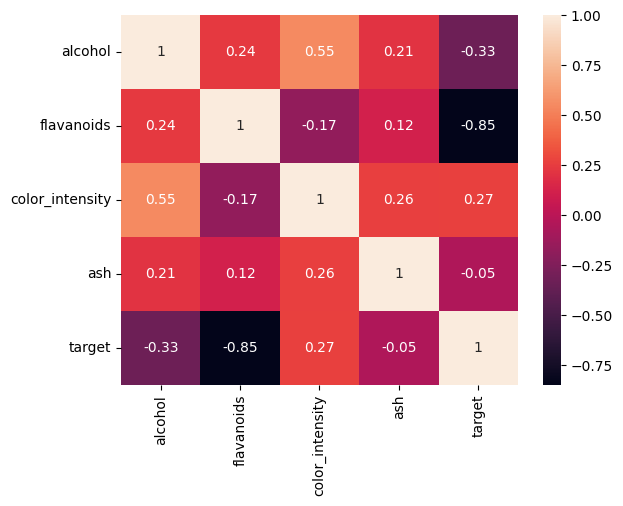

In [6]:
# concat X and y into dataframe
df_X = pd.DataFrame(X)
df_X.columns = selected_features
df_X['target'] = y

# create correlation heatmap
sns.heatmap(df_X.corr(), annot=True)

#### Other Thoughts
- while `flavanoids` is objectively the best feature for classification, `alcohol` and `color_intensity` are relatively weak
- there is a lack of moderate and strong correlation between variables
- manual cleaning of outliers via boxplots could increase accuracy


### Q2. Data with noise
What do you observe by plotting the data without noise compared to plotting with added Gaussian noise? 


#### Answer:
Apart from the overall increased randomness, the added noise brings the distribution of the data closer to that of a normal distribution. This is most evident when visually examining the diagonal plots. This is due to the nature of the noise function used `np.random.normal()` sampling from a [normal Gaussian distribution](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html).

To confirm, I will use the [Shapiro-Wilk](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#scipy.stats.shapiro) normality test to compare how likely data was drawn from a normal distribution.

In [7]:
from scipy.stats import shapiro

# use shapiro-wilk test to measure likelyhood of normality from pvalue
dist_len = len(selected_features)
pvalue_X = 0                                # measure pvalue for both X and XN
pvalue_XN = 0
for i in range(dist_len):                   # iterate over number of features (4)
    stat1, p1 = shapiro(X[:,i])             # calculate pvalue of each column
    stat2, p2 = shapiro(XN[:,i])
    pvalue_X += p1
    pvalue_XN += p2
pvalue_X /= dist_len                        # calculate mean pvalue
pvalue_XN /= dist_len

print(f'Average pvalue of X across {dist_len} features is {pvalue_X}')
print(f'Average pvalue of XN across {dist_len} features is {pvalue_XN}')

# extra: sum pvalue of original noise function
dist_l = 1000
pvalue_noise = 0
for i in range(dist_l):
    noise = np.random.normal(0, 0.6, 178)
    stat3, p3 = shapiro(noise)
    pvalue_noise += p3
pvalue_noise /= dist_l

print(f'Average pvalue of the noise function across {dist_l} iterations is {pvalue_noise}')


Average pvalue of X across 4 features is 0.01468986176983833
Average pvalue of XN across 4 features is 0.18562800856398098
Average pvalue of the noise function across 1000 iterations is 0.5072389748602872


#### Results
The higher the `pvalue` [0, 1] of a series, the more likely the data was sampled from a normal distribution. We can see over 1000 iterations that the original noise function averages to ~0.5. The `pvalue` of `XN` (0.1856) across four features is significantly higher than `X` (0.0147) by a factor of over 12. Since 0.1856 is a score higher than $\alpha = 0.05$, we can assume the data is normally distributed. Therefore, we can conclude that adding Gaussian noise has normalized the data more than the original.

Note: results may vary with different random seeds.

## 2. Implementing kNN 

In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You may use the scikit-learn k-NN implementation from the labs as a guide - and as a way of verifying your results - but it is important that your implementation does not use any libraries other than the basic numpy and matplotlib functions. 

Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

Hint: it helps to break the problem into various sub-problems, implemented as helper function. For example, you might want to implement separate function(s) for calculating the distances between two vectors. And another function that uncovers the nearest neighbour(s) to a given vector. 


In [8]:
# helper code
from scipy.spatial import distance

def euclidean(x1, x2):
    """Distance formula based on Euclidean geometry."""
    dist = np.sqrt(np.sum(np.square(x1-x2)))
    return dist

def manhattan(v1, v2):
    """Distance formula based on Taxicab geometry."""
    dist = np.sum(np.abs(v1-v2))
    return dist

def hamming(b1, b2):
    """Distance formula based on bit string comparison."""
    b1, b2 = np.array(b1), np.array(b2)
    dist = np.average(b1 != b2)
    return dist

# test code
# x1 = np.array([1,2,3])
# x2 = np.array([3,2,1])
# test = euclidean(x1, x2)
# print(test)

# v1 = np.array([1,2,3])
# v2 = np.array([5,3,2])
# test2 = manhattan(v1, v2)
# print(test2)
# print(np.argsort(v2))
# print(hamming([14,2,222],[9,2,333]))

In [9]:
# mykNN code
from collections import Counter

def mykNN(X, y, X_, k, dist_func):
    """
    Classification K-nearest neighbours algorithm.

    Parameters:
    X: training data
    y: target data
    X_: input features
    k: number of closest neighbours
    dist_func: distance calculation method

    Returns:
    predictions: array of predicted target label outputs
    """
    assert len(X) == len(y), 'Data and target arrays must be the same length'

    predictions = []
    for x_ in X_:
        distances = [dist_func(x_, x) for x in X]       # calc distance for every X
        k_indices = np.argsort(distances)[:k]           # get k closest neightbours by index 

        # majority vote to find highest frequency class
        majority = Counter(y[k_indices]).most_common(1)[0][0]
        predictions.append(majority)                    # add all results to array
    
    return np.array(predictions)

# test code
# X = np.array([1,2,3])
# y = np.array([1,0,0])
# X_ = np.array([3,2,1])
#print(mykNN(X, y, X_, 1, euclidean))

Given a datapoint:
- calculate its distance from all other data points
- get the closest K points
- get the label with majority vote

## 3. Classifier evaluation 

In the cell below, implement your own classifier evaluation code. This should include some way of calculating confusion matrices, as well as common metrics like accuracy. 

Write some additional code that lets you display the output of your confusion matrices in a useful and easy-to-read manner.

You might want to test your functions on some test data, and compare the results to the sklearn library versions. 


In [10]:
# create test data for evaluation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_pred = mykNN(X_train, y_train, X_test, 10, euclidean)

XN_train, XN_test, yN_train, yN_test = train_test_split(XN, y, test_size=0.2)
yN_pred = mykNN(XN_train, yN_train, XN_test, 10, euclidean)

print(y_test)
print(y_pred)

[0 0 2 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 2 2 1 0 1 0 2 0 1 1 0 0 2 1 1 0 2 0]
[0 0 2 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 2 2 1 0 1 0 2 0 1 1 0 0 2 1 1 0 2 0]


Custom functions
Accuracy Score:    1.0
Confusion Matrix:
[[16  0  0]
 [ 0 14  0]
 [ 0  0  6]]
Recall Score:      [1. 1. 1.]
Precision Score:   [1. 1. 1.]


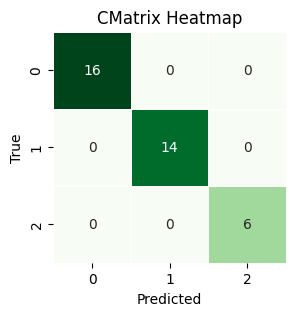

In [11]:
# confusion matrix, accuracy, precision, recall, etc. helpers 

def myAccuracy_score(y_true, y_pred):
    """
    Compares element labels between two arrays.
    
    Parameters:
    y_true: true target labels
    y_pred: predicted target labels

    Returns:
    accuracy: ratio based on matching labels
    """
    assert len(y_pred == y_true), 'Arrays must be the same length'
    accuracy = np.sum(y_true == y_pred) / len(y_pred)
    return accuracy

def myConfusion_matrix(y_true, y_pred):
    """
    Creates a confusion matrix by summing label results.
        
    Parameters:
    y_true: true target labels
    y_pred: predicted target labels

    Returns:
    matrix: 2D array of summed confusion matrix
    """
    assert len(y_pred == y_true), 'Arrays must be the same length'
    dim = len(np.unique(y_true))

    matrix = np.zeros((dim, dim), dtype=np.int32)
    for i in range(0, len(y_true)):
        matrix[y_true[i], y_pred[i]] += 1
    return matrix

def myRecall_score(y_true, y_pred):
    """
    Calculate false negative ratios for each label.
        
    Parameters:
    y_true: true target labels
    y_pred: predicted target labels

    Returns:
    precision: ratio based on false negative sum
    """
    assert len(y_pred == y_true), 'Arrays must be the same length'
    dim = len(np.unique(y_true))
    matrix = myConfusion_matrix(y_true, y_pred)
    
    recall = np.zeros(dim)
    for i in range(dim):
        recall[i] = matrix[i,i] / np.sum(matrix[i,:])
    return recall

def myPrecision_score(y_true, y_pred):
    """
    Calculate false positive ratios for each label.
        
    Parameters:
    y_true: true target labels
    y_pred: predicted target labels

    Returns:
    precision: ratio based on false positive sum
    """
    assert len(y_pred == y_true), 'Arrays must be the same length'
    dim = len(np.unique(y_true))
    matrix = myConfusion_matrix(y_true, y_pred)
    
    precision = np.zeros(dim)
    for i in range(dim):
        precision[i] = matrix[i,i] / np.sum(matrix[:,i])
    return precision


# draw matrix as Seaborn heatmap
def heatmap_matrix(matrix, title='CMatrix Heatmap'):
    """
    Creates a custom Seaborn heatmap based on a matrix.
        
    Parameters:
    matrix: plotted 2D confusion matrix heatmap
    title: string name for plot
    """
    df_m = pd.DataFrame(matrix)
    plt.figure(figsize = (3,3))
    plt.title(title)
    ax = sns.heatmap(df_m, annot=True, linewidths=0.5, cmap="Greens", cbar=False)
    ax.set(xlabel="Predicted", ylabel="True")
    plt.show()


# test helper code
print(f'Custom functions')
print(f'Accuracy Score:    {myAccuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix:\n{myConfusion_matrix(y_test, y_pred)}')
print(f'Recall Score:      {myRecall_score(y_test, y_pred)}')
print(f'Precision Score:   {myPrecision_score(y_test, y_pred)}')
heatmap_matrix(myConfusion_matrix(y_test, y_pred))

In [12]:
# test evaluation code

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score 

# test sklearn metrics
print(f'Scikit-learn metrics')
print(f'Accuracy Score:    {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'Recall Score:      {recall_score(y_test, y_pred, average=None)}')
print(f'Precision Score:   {precision_score(y_test, y_pred, average=None)}')

Scikit-learn metrics
Accuracy Score:    1.0
Confusion Matrix:
[[16  0  0]
 [ 0 14  0]
 [ 0  0  6]]
Recall Score:      [1. 1. 1.]
Precision Score:   [1. 1. 1.]


In [13]:
# measure speed of function executions

import time
import copy

def performance_eval(true, pred, iterations):
    """
    Measures runtime performance of helper and sklearn metrics.

    Parameters:
    true: true labels of data set
    pred: predicted labels of data set
    iterations: integer number

    Returns:
    results: array of mean run times
    """
    var_true = true.copy()      # initialize variables
    var_pred = pred.copy()
    results = np.zeros(8)
    d = 0.002
    itr = iterations
    helpers = [myAccuracy_score, myConfusion_matrix, 
               myRecall_score, myPrecision_score]
    metrics = [accuracy_score, confusion_matrix, 
               recall_score, precision_score]

    for i in range(itr):
        for j in range(4):       # custom helpers
            start = time.time()
            helpers[j](var_true, var_pred)
            time.sleep(d)
            end = time.time()
            results[j*2] += (end-start-d)

        for j in range(2):       # sklearn metrics
            start = time.time()
            metrics[j](var_true, var_pred)
            time.sleep(d)
            end = time.time()
            results[j*2+1] += (end-start-d)
        
        for j in range(2):
            start = time.time()
            metrics[j+2](var_true, var_pred, average=None)
            time.sleep(d)
            end = time.time()
            results[j*2+5] += (end-start-d)
    return results

# reshape into dataframe
timed_results = [performance_eval(y_test,y_pred, 10), 
                 performance_eval(y_test,y_pred, 100), 
                 performance_eval(y_test,y_pred, 1000)]
#print(timed_results)

In [14]:
# reshape into dataframe and display results
time_df = pd.DataFrame(timed_results, index=['n=10','n=100','n=1000'])
time_df.columns = ['accuracy', 'accuracy(sk)','matrix', 'matrix(sk)','recall', 'recall(sk)','precision', 'precision(sk)',]
display(time_df)

,accuracy,accuracy(sk),matrix,matrix(sk),recall,recall(sk),precision,precision(sk)
n=10,0.007011,0.008027,0.008002,0.009960,0.006996,0.011024,0.007982,0.011975
n=100,0.071886,0.074800,0.064064,0.083957,0.078851,0.100512,0.069967,0.100871
n=1000,0.742216,0.774197,0.706044,0.813034,0.788162,0.911951,0.727631,0.950580


#### Commentary
In comparison of the custom helpers and scikit-learn metric functions, the expected outputs are identical. 
I also wrote a quick visualization function to plot the confusion matrix as a heatmap.


I opted to compare metrics by measuring computational time. I wrote a function that measured the mean time it took to run every function over $n$ iterations.
On average it seems the sklearn metrics are 30-50% slower than my custom helper functions. 
This is likely due to the fact the official libraries are more meticulous with checking input validation and edge case usability.




## 4. Nested Cross-validation using your implementation of KNN  

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above. You must write your own code -- the scikit-learn module may only be used for verification purposes. 

Your code for nested cross-validation should invoke your kNN function (see above). You cross validation function should be invoked similary to:

    accuracies_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan',...]`` evaluates the distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results.

**Notes:** 
- you should perform nested cross-validation on **both** your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should evaluate **at least** two distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold
- for each **fold**, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)


In [15]:
# myNestedCrossVal code

def myNestedCrossVal(X, y, k, neighbours, dist_list, seed):
    """
    Main cross validation function, 
    uses kNN algorithm to predict y labels over k folds.

    Parameters:
    X: data training labels
    y: data true target labels
    k: number of folds
    neighbours: list of neighbours to optimize
    dist_list: list of distance functions by string name
    seed: numerical seed for numpy random generator

    Returns:
    acc_folds: array of the highest accuracies by fold
    sum_detail: details of the most successful folds
    cmatrices: cmatrices of the best folds
    pr_scores: recall and precision scores of the best folds
    """
    np.random.seed(seed)
    
    # initialize variables
    dist_dict = {'euclidean':euclidean, 'manhattan':manhattan, 'hamming':hamming}
    acc_folds = []
    sum_detail = []
    cmatrices = []
    pr_scores = []

    # split training data into k folds by shuffling indices
    indices = np.random.permutation(np.arange(0, len(X), 1)).flatten()
    folds = np.array_split(indices, k)

    # iterate over folds
    for i in range(k):
        # split test and training data by i index
        train_indices = [folds[n] for n in range(k) if n != i]
        train_indices = np.concatenate(np.array(train_indices, dtype=object), axis=0)
        X_train, y_train = X[train_indices], y[train_indices]
        X_test, y_test = X[folds[i]], y[folds[i]]

        # fold summary variables
        best_acc = 0
        best_n = 0
        best_dist = ''
        best_fold = []
        for n in neighbours:
            for dist in dist_list:
                # predict labels using kNN
                y_pred = mykNN(X_train, y_train, X_test, n, dist_dict[dist])
                acc = myAccuracy_score(y_test, y_pred)

                # record best fold
                if best_acc < acc:
                    best_acc = acc
                    best_n = n
                    best_dist = dist
                    best_fold = [y_test, y_pred]
                print(f'labels={y_pred}, acc={round(acc,4)}, n={n}, dist={dist}')
        
        # summarize and record best fold parameters
        acc_folds.append(best_acc)
        sum_detail.append([best_acc, best_n, best_dist, len(best_fold[1])])
        pr_scores.append([myRecall_score(best_fold[0], best_fold[1]), 
                          myPrecision_score(best_fold[0], best_fold[1])])
        cmatrices.append(myConfusion_matrix(best_fold[0], best_fold[1]))
        print(f'The best parameters for fold {i+1}:')
        print(f'Best Accuracy:      {best_acc}')
        print(f'Best Neighbour #:   {best_n}') 
        print(f'Best Distance Type: {best_dist}')
        heatmap_matrix(myConfusion_matrix(best_fold[0], best_fold[1]), f'CMatrix Fold {i+1} Heatmap')
    # return array of k best accuracies
    return acc_folds, sum_detail, cmatrices, pr_scores

labels=[0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 0 1 2 2 2 1 1 1 0 0 1 2 0 0 0], acc=0.9722, n=1, dist=euclidean
labels=[0 0 2 0 1 0 1 2 1 2 1 2 0 1 0 1 1 1 0 1 0 0 1 2 2 2 1 0 1 0 0 1 2 0 0 0], acc=0.9167, n=1, dist=manhattan
labels=[1 1 2 2 1 0 1 2 2 0 2 1 0 1 2 1 0 0 1 1 2 2 1 2 2 2 2 0 2 1 1 0 0 2 0 2], acc=0.3889, n=1, dist=hamming
labels=[0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 0 1 2 2 2 1 1 1 0 0 1 2 0 0 0], acc=0.9722, n=2, dist=euclidean
labels=[0 0 2 0 1 0 1 2 1 2 1 2 0 1 0 1 1 1 0 1 0 0 1 2 2 2 1 0 1 0 0 1 2 0 0 0], acc=0.9167, n=2, dist=manhattan
labels=[1 1 2 2 1 0 1 2 2 0 2 1 0 1 2 1 0 0 1 1 2 2 1 2 2 2 2 0 2 1 1 0 0 2 0 2], acc=0.3889, n=2, dist=hamming
labels=[0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 0 1 2 2 2 1 0 1 0 0 1 2 0 0 0], acc=0.9444, n=3, dist=euclidean
labels=[0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 0 1 2 2 2 1 0 1 0 0 1 2 0 0 0], acc=0.9444, n=3, dist=manhattan
labels=[0 1 0 2 1 2 1 2 2 2 2 1 0 1 2 1 0 1 1 0 2 2 2 2 0 2 1 1 2 1 1 1 2 2 0 2], acc=0.4444

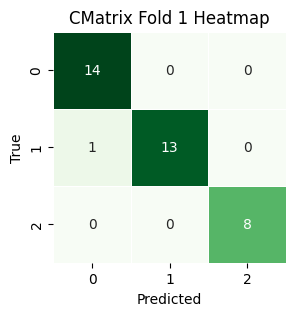

labels=[2 2 1 2 1 1 1 1 2 0 1 1 2 0 1 0 0 2 2 1 1 0 1 0 2 1 1 2 0 0 1 2 0 0 1 2], acc=0.9444, n=1, dist=euclidean
labels=[2 2 1 2 1 1 1 1 2 0 1 1 2 0 1 0 0 2 2 1 1 0 1 1 2 1 1 2 0 0 1 2 0 0 1 2], acc=0.9167, n=1, dist=manhattan
labels=[2 2 0 2 0 1 1 2 2 2 1 1 0 2 1 0 1 1 1 2 1 1 1 1 0 1 2 0 2 0 0 1 0 2 1 2], acc=0.5278, n=1, dist=hamming
labels=[2 2 1 2 1 1 1 1 2 0 1 1 2 0 1 0 0 2 2 1 1 0 1 0 2 1 1 2 0 0 1 2 0 0 1 2], acc=0.9444, n=2, dist=euclidean
labels=[2 2 1 2 1 1 1 1 2 0 1 1 2 0 1 0 0 2 2 1 1 0 1 1 2 1 1 2 0 0 1 2 0 0 1 2], acc=0.9167, n=2, dist=manhattan
labels=[2 2 0 2 0 1 1 2 2 2 1 1 0 2 1 0 1 1 1 2 1 1 1 1 0 1 2 0 2 0 0 1 0 2 1 2], acc=0.5278, n=2, dist=hamming
labels=[2 2 1 2 1 1 1 1 2 0 1 1 2 0 1 0 0 2 2 1 1 0 1 0 2 1 1 2 0 0 1 2 0 0 1 2], acc=0.9444, n=3, dist=euclidean
labels=[2 2 1 2 0 1 1 1 2 0 1 1 2 0 1 0 0 2 2 1 1 0 1 0 2 1 1 2 0 0 1 2 0 0 1 2], acc=0.9722, n=3, dist=manhattan
labels=[0 2 1 2 0 1 1 2 2 2 1 1 2 0 1 0 1 1 1 2 1 1 1 2 0 1 0 0 2 0 0 1 0 2 1 2], acc=0.5833

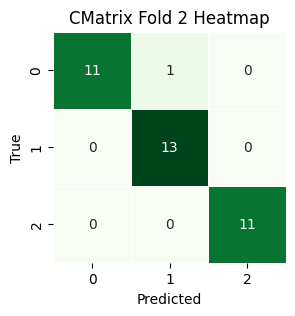

labels=[1 0 2 1 0 2 1 1 1 1 0 0 1 0 0 2 0 1 1 0 1 1 1 2 2 0 1 2 2 2 0 0 1 2 2 1], acc=0.8889, n=1, dist=euclidean
labels=[1 0 2 1 0 2 1 1 0 1 0 0 1 0 0 2 0 1 1 0 1 1 1 2 2 0 1 2 2 2 0 0 1 2 2 1], acc=0.9167, n=1, dist=manhattan
labels=[1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 2 1 0 0 2 1 2 1 0 0 0 2 1 2 2 1], acc=0.4722, n=1, dist=hamming
labels=[1 0 2 1 0 2 1 1 1 1 0 0 1 0 0 2 0 1 1 0 1 1 1 2 2 0 1 2 2 2 0 0 1 2 2 1], acc=0.8889, n=2, dist=euclidean
labels=[1 0 2 1 0 2 1 1 0 1 0 0 1 0 0 2 0 1 1 0 1 1 1 2 2 0 1 2 2 2 0 0 1 2 2 1], acc=0.9167, n=2, dist=manhattan
labels=[1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 2 1 0 0 2 1 2 1 0 0 0 2 1 2 2 1], acc=0.4722, n=2, dist=hamming
labels=[1 0 2 1 0 2 1 1 0 1 0 0 1 0 0 2 0 1 1 0 1 1 1 2 2 0 1 2 2 2 0 0 1 2 2 1], acc=0.9167, n=3, dist=euclidean
labels=[1 0 2 1 0 2 1 1 0 1 0 0 1 0 0 2 0 1 1 0 1 1 1 2 2 0 1 2 2 2 0 0 1 2 2 0], acc=0.8889, n=3, dist=manhattan
labels=[1 1 2 1 0 0 0 1 0 1 0 0 0 0 0 0 1 2 1 0 2 1 0 0 2 0 2 1 0 0 0 2 1 0 0 1], acc=0.5278

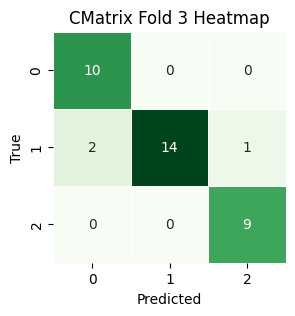

labels=[2 1 1 1 0 0 2 0 2 0 0 1 1 0 0 0 1 0 1 1 1 1 2 2 2 1 0 0 1 2 2 0 1 2 2], acc=0.9429, n=1, dist=euclidean
labels=[2 1 1 1 0 0 2 0 2 0 0 1 1 0 0 0 1 0 1 2 1 1 2 2 2 1 0 0 1 2 2 0 1 2 2], acc=0.9714, n=1, dist=manhattan
labels=[2 1 1 0 0 0 0 1 1 0 0 1 1 1 0 2 0 0 1 1 1 0 2 2 0 1 1 0 1 1 1 1 2 2 2], acc=0.5429, n=1, dist=hamming
labels=[2 1 1 1 0 0 2 0 2 0 0 1 1 0 0 0 1 0 1 1 1 1 2 2 2 1 0 0 1 2 2 0 1 2 2], acc=0.9429, n=2, dist=euclidean
labels=[2 1 1 1 0 0 2 0 2 0 0 1 1 0 0 0 1 0 1 2 1 1 2 2 2 1 0 0 1 2 2 0 1 2 2], acc=0.9714, n=2, dist=manhattan
labels=[2 1 1 0 0 0 0 1 1 0 0 1 1 1 0 2 0 0 1 1 1 0 2 2 0 1 1 0 1 1 1 1 2 2 2], acc=0.5429, n=2, dist=hamming
labels=[2 1 1 1 0 0 2 0 2 0 0 1 1 0 0 0 1 0 1 2 1 1 2 2 2 1 0 0 1 2 2 0 1 2 2], acc=0.9714, n=3, dist=euclidean
labels=[2 1 1 1 0 0 2 0 2 0 0 1 1 0 0 0 1 0 1 2 1 1 2 2 2 1 0 0 1 2 2 0 0 2 2], acc=0.9429, n=3, dist=manhattan
labels=[1 1 1 1 0 0 2 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 2 2 0 1 1 0 1 1 1 1 2 2 2], acc=0.6571, n=3, dist=hammin

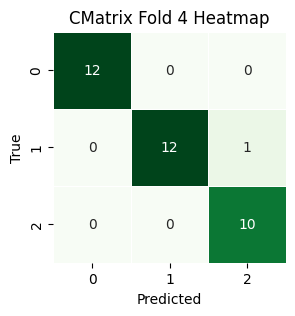

labels=[2 2 1 0 1 0 2 0 0 1 0 0 2 1 0 2 2 0 0 2 1 2 1 1 1 1 1 1 2 0 0 1 0 1 1], acc=0.9429, n=1, dist=euclidean
labels=[2 2 1 0 1 0 2 0 0 1 0 0 2 1 0 2 2 0 0 2 1 2 1 1 1 1 1 0 2 0 0 1 0 1 1], acc=0.9143, n=1, dist=manhattan
labels=[2 2 1 2 2 1 2 1 0 1 2 0 2 1 1 2 0 0 1 2 2 2 1 1 1 0 0 0 1 0 0 1 2 1 1], acc=0.6, n=1, dist=hamming
labels=[2 2 1 0 1 0 2 0 0 1 0 0 2 1 0 2 2 0 0 2 1 2 1 1 1 1 1 1 2 0 0 1 0 1 1], acc=0.9429, n=2, dist=euclidean
labels=[2 2 1 0 1 0 2 0 0 1 0 0 2 1 0 2 2 0 0 2 1 2 1 1 1 1 1 0 2 0 0 1 0 1 1], acc=0.9143, n=2, dist=manhattan
labels=[2 2 1 2 2 1 2 1 0 1 2 0 2 1 1 2 0 0 1 2 2 2 1 1 1 0 0 0 1 0 0 1 2 1 1], acc=0.6, n=2, dist=hamming
labels=[2 2 1 0 1 0 2 0 0 1 0 0 2 1 0 2 2 0 0 2 1 2 1 1 1 1 1 0 2 0 0 1 0 1 1], acc=0.9143, n=3, dist=euclidean
labels=[2 2 1 0 1 0 2 0 0 1 0 0 2 1 0 2 2 0 0 2 1 2 1 1 1 1 1 0 2 0 0 1 0 1 1], acc=0.9143, n=3, dist=manhattan
labels=[2 2 1 2 1 1 2 1 2 1 0 0 2 1 0 2 1 0 1 0 2 2 1 1 0 0 0 0 1 0 0 1 2 1 1], acc=0.6, n=3, dist=hamming
labels=

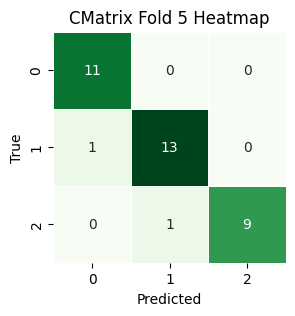

Best accuracies per fold: [0.9722222222222222, 0.9722222222222222, 0.9166666666666666, 0.9714285714285714, 0.9428571428571428]
[[array([1.        , 0.92857143, 1.        ]), array([0.93333333, 1.        , 1.        ])], [array([0.91666667, 1.        , 1.        ]), array([1.        , 0.92857143, 1.        ])], [array([1.        , 0.82352941, 1.        ]), array([0.83333333, 1.        , 0.9       ])], [array([1.        , 0.92307692, 1.        ]), array([1.        , 1.        , 0.90909091])], [array([1.        , 0.92857143, 0.9       ]), array([0.91666667, 0.92857143, 1.        ])]]


In [16]:
# evaluate clean data code

acc_folds, sum_detail, cmatrices, pr_scores = myNestedCrossVal(X, y, 5, list(range(1, 11)), ['euclidean', 'manhattan', 'hamming'], 42)
print(f'Best accuracies per fold: {acc_folds}')
print(pr_scores)


labels=[0 0 2 0 1 0 1 2 1 0 0 2 0 1 0 1 1 1 0 1 0 0 1 2 2 2 1 1 1 0 1 1 2 0 0 0], acc=0.9167, n=1, dist=euclidean
labels=[0 0 2 0 0 0 1 2 1 0 0 2 0 1 0 1 1 1 0 1 0 0 1 2 2 2 1 1 1 0 1 1 2 0 0 0], acc=0.8889, n=1, dist=manhattan
labels=[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2], acc=0.2222, n=1, dist=hamming
labels=[0 0 2 0 1 0 1 2 1 0 0 2 0 1 0 1 1 1 0 1 0 0 1 2 2 2 1 1 1 0 1 1 2 0 0 0], acc=0.9167, n=2, dist=euclidean
labels=[0 0 2 0 0 0 1 2 1 0 0 2 0 1 0 1 1 1 0 1 0 0 1 2 2 2 1 1 1 0 1 1 2 0 0 0], acc=0.8889, n=2, dist=manhattan
labels=[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2], acc=0.2222, n=2, dist=hamming
labels=[0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 0 1 2 2 2 1 1 1 0 1 1 2 0 0 0], acc=0.9444, n=3, dist=euclidean
labels=[0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 0 1 2 2 2 1 1 1 0 1 1 2 0 0 0], acc=0.9444, n=3, dist=manhattan
labels=[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2], acc=0.2222

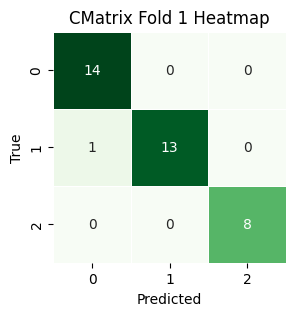

labels=[2 2 1 2 1 1 1 1 2 0 1 1 2 0 0 0 0 2 2 1 1 0 1 0 2 1 1 2 1 0 1 2 1 0 1 2], acc=0.8611, n=1, dist=euclidean
labels=[2 2 1 2 1 1 1 1 2 0 1 1 2 0 0 0 0 2 2 1 1 0 1 0 2 1 1 2 1 0 1 2 0 0 1 2], acc=0.8889, n=1, dist=manhattan
labels=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], acc=0.3333, n=1, dist=hamming
labels=[2 2 1 2 1 1 1 1 2 0 1 1 2 0 0 0 0 2 2 1 1 0 1 0 2 1 1 2 1 0 1 2 1 0 1 2], acc=0.8611, n=2, dist=euclidean
labels=[2 2 1 2 1 1 1 1 2 0 1 1 2 0 0 0 0 2 2 1 1 0 1 0 2 1 1 2 1 0 1 2 0 0 1 2], acc=0.8889, n=2, dist=manhattan
labels=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], acc=0.3333, n=2, dist=hamming
labels=[2 2 0 2 1 1 1 1 2 0 1 1 2 0 0 0 0 2 2 1 1 0 1 0 2 1 1 2 0 0 1 2 1 1 1 2], acc=0.8333, n=3, dist=euclidean
labels=[2 2 1 2 1 1 1 1 2 0 1 1 2 0 0 0 0 2 2 1 1 0 1 0 2 1 1 2 0 0 1 2 0 1 1 2], acc=0.8889, n=3, dist=manhattan
labels=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], acc=0.3333

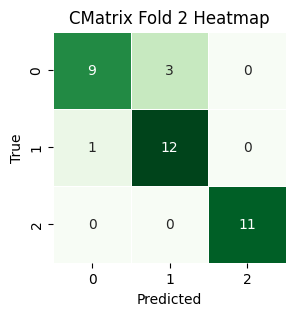

labels=[1 1 2 0 0 2 1 1 1 0 0 0 1 1 0 2 1 1 1 0 1 1 1 2 2 0 1 2 2 2 0 0 1 2 1 0], acc=0.75, n=1, dist=euclidean
labels=[1 1 2 1 0 2 1 1 1 1 0 0 1 1 0 2 1 0 1 0 0 1 1 2 2 0 1 2 2 2 0 0 1 2 1 0], acc=0.75, n=1, dist=manhattan
labels=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], acc=0.2778, n=1, dist=hamming
labels=[1 1 2 0 0 2 1 1 1 0 0 0 1 1 0 2 1 1 1 0 1 1 1 2 2 0 1 2 2 2 0 0 1 2 1 0], acc=0.75, n=2, dist=euclidean
labels=[1 1 2 1 0 2 1 1 1 1 0 0 1 1 0 2 1 0 1 0 0 1 1 2 2 0 1 2 2 2 0 0 1 2 1 0], acc=0.75, n=2, dist=manhattan
labels=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], acc=0.2778, n=2, dist=hamming
labels=[1 1 2 1 0 2 1 1 1 1 0 0 1 1 0 2 1 0 1 0 1 1 1 2 2 0 1 2 2 2 1 0 1 2 1 0], acc=0.8056, n=3, dist=euclidean
labels=[1 1 2 1 0 2 1 1 1 0 0 0 1 1 0 2 1 0 1 0 1 1 1 2 2 0 1 2 2 2 1 0 1 2 1 0], acc=0.7778, n=3, dist=manhattan
labels=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], acc=0.2778, n=3, d

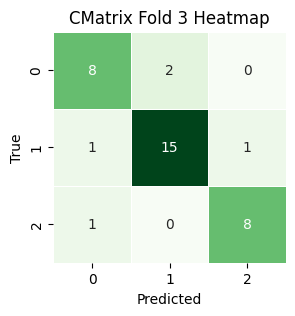

labels=[2 1 1 1 0 0 2 0 2 2 0 1 1 0 0 0 0 0 1 2 1 1 0 2 2 1 2 0 1 2 2 0 1 2 2], acc=0.8857, n=1, dist=euclidean
labels=[2 0 1 1 0 0 2 0 2 2 0 1 1 0 0 0 0 0 1 2 1 1 0 2 2 1 2 0 1 2 2 0 1 2 2], acc=0.8571, n=1, dist=manhattan
labels=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], acc=0.3429, n=1, dist=hamming
labels=[2 1 1 1 0 0 2 0 2 2 0 1 1 0 0 0 0 0 1 2 1 1 0 2 2 1 2 0 1 2 2 0 1 2 2], acc=0.8857, n=2, dist=euclidean
labels=[2 0 1 1 0 0 2 0 2 2 0 1 1 0 0 0 0 0 1 2 1 1 0 2 2 1 2 0 1 2 2 0 1 2 2], acc=0.8571, n=2, dist=manhattan
labels=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], acc=0.3429, n=2, dist=hamming
labels=[2 1 1 1 0 0 2 0 2 2 0 1 1 0 0 0 0 0 1 2 1 1 1 2 2 1 0 0 1 2 2 0 0 2 2], acc=0.9143, n=3, dist=euclidean
labels=[2 1 1 1 0 0 2 0 2 2 0 1 1 0 0 0 0 0 1 2 1 1 1 2 2 1 0 0 1 2 2 0 0 2 2], acc=0.9143, n=3, dist=manhattan
labels=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], acc=0.3429, n=3, dist=hammin

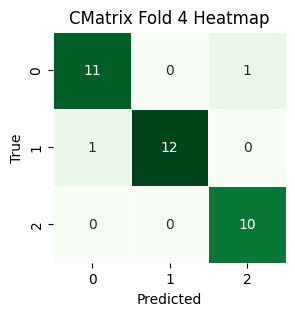

labels=[2 2 1 0 1 0 2 0 0 0 1 0 2 1 1 2 2 0 0 2 2 2 1 1 1 1 1 1 2 0 1 1 0 1 2], acc=0.8857, n=1, dist=euclidean
labels=[2 2 1 0 1 0 2 0 0 0 1 0 2 1 1 2 2 0 0 2 2 0 1 1 1 1 1 1 2 0 1 0 0 1 2], acc=0.8286, n=1, dist=manhattan
labels=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], acc=0.3143, n=1, dist=hamming
labels=[2 2 1 0 1 0 2 0 0 0 1 0 2 1 1 2 2 0 0 2 2 2 1 1 1 1 1 1 2 0 1 1 0 1 2], acc=0.8857, n=2, dist=euclidean
labels=[2 2 1 0 1 0 2 0 0 0 1 0 2 1 1 2 2 0 0 2 2 0 1 1 1 1 1 1 2 0 1 0 0 1 2], acc=0.8286, n=2, dist=manhattan
labels=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], acc=0.3143, n=2, dist=hamming
labels=[2 2 1 0 1 0 2 0 0 1 0 0 2 1 0 2 2 0 0 2 2 2 1 1 1 1 1 0 2 0 1 0 0 1 2], acc=0.9143, n=3, dist=euclidean
labels=[2 2 1 0 1 0 2 0 0 0 0 0 2 1 0 2 2 0 0 2 2 2 1 1 1 1 1 0 2 0 1 0 0 1 2], acc=0.8857, n=3, dist=manhattan
labels=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], acc=0.3143, n=3, dist=hammin

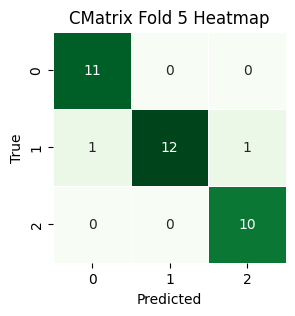

Best accuracies per fold: [0.9722222222222222, 0.8888888888888888, 0.8611111111111112, 0.9428571428571428, 0.9428571428571428]


In [17]:
# evaluate noisy data code

acc_foldsN, sum_detailN, cmatricesN, pr_scoresN = myNestedCrossVal(XN, y, 5, list(range(1, 11)), ['euclidean', 'manhattan', 'hamming'], 42)
print(f'Best accuracies per fold: {acc_foldsN}')

In [18]:
# Print the summaries

print('Summary for CLEAN data')
print(f'Mean Accuracy: {np.mean(acc_folds)}')
df_d = pd.DataFrame(sum_detail, index=['fold1','fold2','fold3','fold4','fold5'])
df_d.columns=['accuracy', 'neighbours', 'distance', 'count']
display(df_d)



print('Summary for NOISY data')
print(f'Mean Accuracy: {np.mean(acc_foldsN)}')
df_N = pd.DataFrame(sum_detailN, index=['fold1','fold2','fold3','fold4','fold5'])
df_N.columns=['accuracy', 'neighbours', 'distance', 'count']
display(df_N)


Summary for CLEAN data
Mean Accuracy: 0.9550793650793651


,accuracy,neighbours,distance,count
fold1,0.972222,1,euclidean,36
fold2,0.972222,3,manhattan,36
fold3,0.916667,1,manhattan,36
fold4,0.971429,1,manhattan,35
fold5,0.942857,1,euclidean,35


Summary for NOISY data
Mean Accuracy: 0.9215873015873017


,accuracy,neighbours,distance,count
fold1,0.972222,5,euclidean,36
fold2,0.888889,1,manhattan,36
fold3,0.861111,10,euclidean,36
fold4,0.942857,5,euclidean,35
fold5,0.942857,4,euclidean,35


## 5. Summary of results

Using your results from above, fill out the following table using the **clean** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 0.972222  |  1 | euclidean  |
| 2 | 0.972222  |  3 | manhattan  |
| 3 | 0.916667  |  1 | manhattan  |
| 4 | 0.971429  |  1 | manhattan  |
| 5 | 0.942857  |  1 | euclidean  |
| **total** | 0.955079 $\pm$ 0.02270 |

Where **total** is given as an average over all the folds, and $\pm$ the standard deviation.

Now fill out the following table using the **noisy** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 0.972222  |  5 | euclidean  |
| 2 | 0.888889  |  1 | manhattan  |
| 3 | 0.861111  |  10 | euclidean  |
| 4 | 0.942857  |  5 | euclidean  |
| 5 | 0.942857  |  4 | euclidean  |
| **total** | 0.921587 $\pm$ 0.03727 |


### 5.2. Confusion matrix summary

Summarise the overall results of your nested cross validation evaluation of your K-NN algorithm using two summary confusion matrices (one for the noisy data, one for the clean data). You might want to adapt your ```myNestedCrossVal``` code above to also return a list of confusion matrices.

Use or adapt your evaluation code above to print the two confusion matrices below. Make sure you label the matrix rows and columns. You might also want to show class-relative precision and recall. 


CLEAN


,recall(0),recall(1),recall(2),precision(0),precision(1),precision(2)
fold1,1.000000,0.928571,1.0,0.933333,1.000000,1.000000
fold2,0.916667,1.000000,1.0,1.000000,0.928571,1.000000
fold3,1.000000,0.823529,1.0,0.833333,1.000000,0.900000
fold4,1.000000,0.923077,1.0,1.000000,1.000000,0.909091
fold5,1.000000,0.928571,0.9,0.916667,0.928571,1.000000


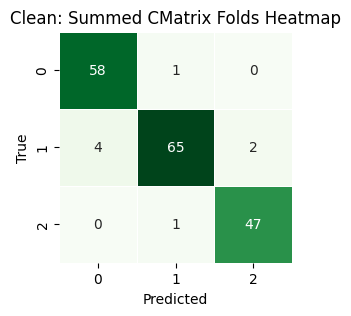



NOISY


,recall(0),recall(1),recall(2),precision(0),precision(1),precision(2)
fold1,1.000000,0.928571,1.000000,0.933333,1.000000,1.000000
fold2,0.750000,0.923077,1.000000,0.900000,0.800000,1.000000
fold3,0.800000,0.882353,0.888889,0.800000,0.882353,0.888889
fold4,0.916667,0.923077,1.000000,0.916667,1.000000,0.909091
fold5,1.000000,0.857143,1.000000,0.916667,1.000000,0.909091


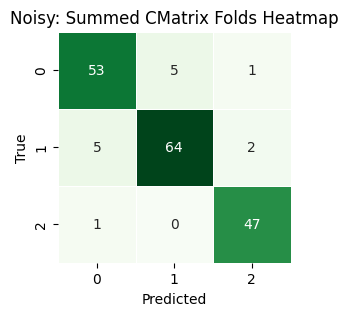

In [19]:
print('CLEAN')
# clean data summary results

sum_cmatrices = np.sum(cmatrices, axis=0)
df_pr = np.array(pr_scores).reshape(5,6)
df_pr = pd.DataFrame(df_pr, index=['fold1','fold2','fold3','fold4','fold5'])
df_pr.columns=['recall(0)','recall(1)','recall(2)', 'precision(0)', 'precision(1)', 'precision(2)']
display(df_pr)
heatmap_matrix(sum_cmatrices, 'Clean: Summed CMatrix Folds Heatmap')



print('\n\nNOISY')
# clean data summary results

sum_cmatrices = np.sum(cmatricesN, axis=0) 
df_prN = np.array(pr_scoresN).reshape(5,6)
df_prN = pd.DataFrame(df_prN, index=['fold1','fold2','fold3','fold4','fold5'])
df_prN.columns=['recall(0)','recall(1)','recall(2)', 'precision(0)', 'precision(1)', 'precision(2)']
display(df_prN)
heatmap_matrix(sum_cmatrices, 'Noisy: Summed CMatrix Folds Heatmap')

## 6. More questions 

Now answer the following questions as fully as you can. The answers should be based on your implementation above. Write your answers in the Markdown cells below each question.



### Q3.	 Influence of noise
Do the best parameters change when noise is added to the data? Can you say that one parameter choice is better regardless of the data used? 


#### Answer:
Yes, the parameters change significantly With noisy data, because the accuracy is overall lower than the clean data. 
In clean data, the kNN model could consistently predict with high accuracy by matching only one neighbour $k=1$. Noisy data instead averaging around $k=5$.
Manhattan distance was a good early predictor of high accuracy in clean data, while Euclidean was more consistent for noisy data.


I would say the parameters for the noisy data ($k=5$, Euclidean) is better generalized. By running many iterations and folds, we are prone to overfitting by optimizing parameters during training. We still need to be considerate of the small sample size and (distribution) bias due to lack of real world data, rather judge on a dataset-by-dataset basis.

### Q4. Tie break
Assume that you have selected the number of neighbours to be an even number, e.g., 2. For one of the neighbours, the suggested class is 1, and for the other neighbour the suggested class is 2. How would you break the tie? Write example pseudocode that does this.

#### Answer:

For classification, one option is to precompile a list of the highest the classes by frequency and break equidistant ties by looking up the frequency table.

```python
def mykNN(X, y, X_, k, dist_func):
    
    # create frequency table based on labels in y
    lookup = {}
    for ele in y:
        if ele in lookup:
            lookup[ele] += 1
        else:
            lookup[ele] = 1

    predictions = []
    for x_ in X_:
        distances = [dist_func(x_, x) for x in X]
        k_indices = np.argsort(distances)[:k]

        # vote to find most common labels 
        majority = vote(y[k_indices])
        
        # if there is more than one element, there is a tie 
        # break it by using frequency table lookup
        if len(majority) > 1:
            winner = 0
            for tie in majority:
                if lookup[tie] > lookup[winner]:
                    winner = tie
                if lookup[tie] == lookup[winner]:
                    winner = [random.choice([tie, winner])]
            majority = winner

        # append to predicitions, continue with rest of code
        predictions.append(majority[0])
    return np.array(predictions)
```

If the frequencies are tied, another option is to just choose at random.

### Q5.	Beyond Wine 
If you were to run your k-nn algorithm on a new dataset (e.g., the breast cancer dataset, or Iris), what considerations would you need to take into consideration? Outline any changes that might be needed to your code. 


#### Answer:
The main considerations of changing to a new dataset is the lack of data cleaning, feature normalization, and input validation in my code.
- data will need to be structured in a way that numpy or current function parameters will accept
- non-numerical and missing data will not be accepted ie. distance functions
- lack of normalization will truncate very large or tiny data
- lack of error and edge case assertions may cause bugs

```python
def euclidean(x1, x2):
    dist = np.sqrt(np.sum(np.square(x1-x2)))
    return dist
```

For example, my current euclidean function assumes numerical data, so accidentally passing an uncasted string feature will cause this to throw an error. 

References:
==
- [Edit a Seaborn Legend, Trenton Mckinney, 2021](https://stackoverflow.com/questions/45201514/how-to-edit-a-seaborn-legend-title-and-labels-for-figure-level-functions)
- [Classification Basics, Jewel Britton, 2020](https://towardsdatascience.com/classification-basics-walk-through-with-the-iris-data-set-d46b0331bf82)
- [Feature Selection for Machine Learning Models, Kousik Roy, 2022](https://medium.com/@KousikRoyDataScientist/feature-selection-in-machine-learning-9e07a4664439)
- [Normality Tests in Python, Jason Brownlee, 2018](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)
- [Computing Various Distances in Python, Isha Bansal, 2021](https://www.askpython.com/python/examples/compute-distances-in-python)
- [Breaking Ties in K-NN Classification, Nicholas Pylypiw, 2017](https://www.linkedin.com/pulse/breaking-ties-k-nn-classification-nicholas-pylypiw)